In [662]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold

from sklearn import metrics
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing  # SES
from statsmodels.tsa.holtwinters import Holt  # holts exponential  smoothening
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [663]:
# loading the dataset

data = pd.read_excel(r"C:\Users\91863\Downloads\Airlines+Data (1).xlsx")

In [664]:
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [665]:
data.set_index("Month",inplace=True)

In [666]:
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [667]:
# data  exploration
data.shape

(96, 1)

In [668]:
data.dtypes

Passengers    int64
dtype: object

In [669]:
data.isnull().sum()

Passengers    0
dtype: int64

In [670]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [671]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [672]:
data[data.duplicated()].shape

(16, 1)

In [673]:
data[data.duplicated()]

,Passengers
Month,
1995-08-01,148
1995-12-01,118
1996-04-01,135
1996-08-01,170
1997-06-01,178
1997-08-01,199
1998-11-01,172
1999-02-01,196
1999-11-01,180


In [674]:
df = data.copy()

In [675]:
df.drop_duplicates(inplace=True)

In [676]:
df.shape

(80, 1)

In [677]:
data.shape

(96, 1)

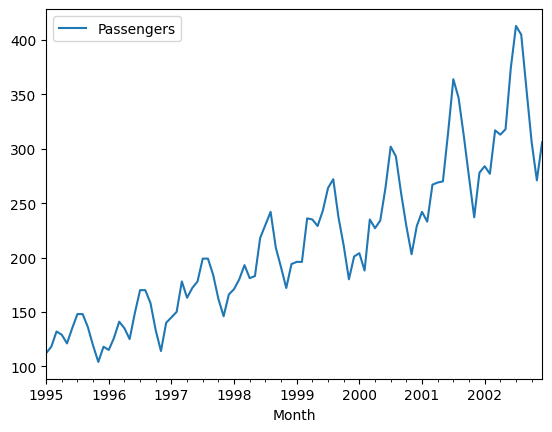

In [678]:
# line plot of time series
from matplotlib import pyplot
data.plot()
pyplot.show()

           *   it is an increasing trend linearly. so trend is not constant.

array([[<Axes: title={'center': 'Passengers'}>]], dtype=object)

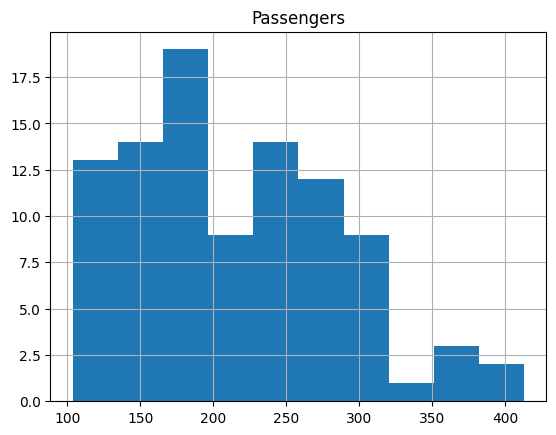

In [679]:
data.hist()

<Axes: ylabel='Density'>

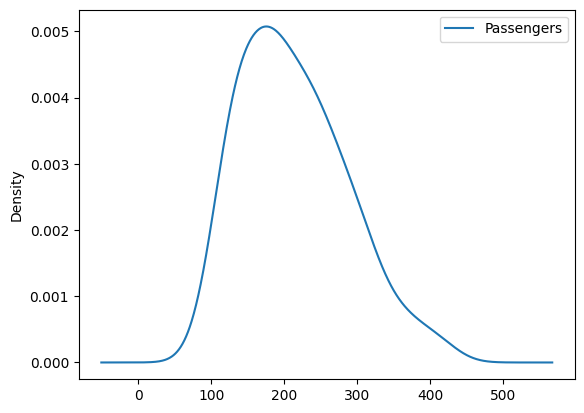

In [680]:
data.plot(kind="kde")


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

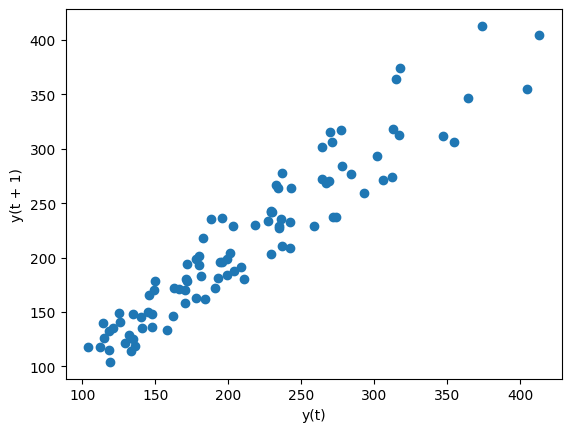

In [681]:
# lag plot
from pandas.plotting import lag_plot
lag_plot(data)

In [682]:
data.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Month')

In [683]:
# upsampling


upsampled = df.resample("M").mean()
print(upsampled.head(10))


            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31         NaN
1995-09-30       136.0
1995-10-31       119.0


            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31       142.0
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31       109.5
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0


<Axes: xlabel='Month'>

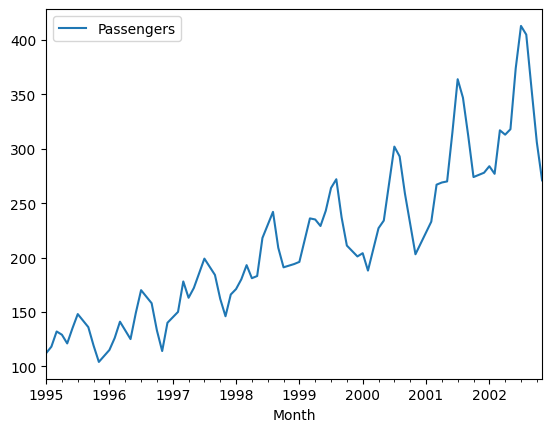

In [684]:
df = upsampled.interpolate(method="linear") ## interpolation was done for nan values which we get after doing upsampling by month
print(df.head(15))
df.plot()

In [685]:
df

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-07-31,413.0
2002-08-31,405.0
2002-09-30,355.0


#  square root tranformations

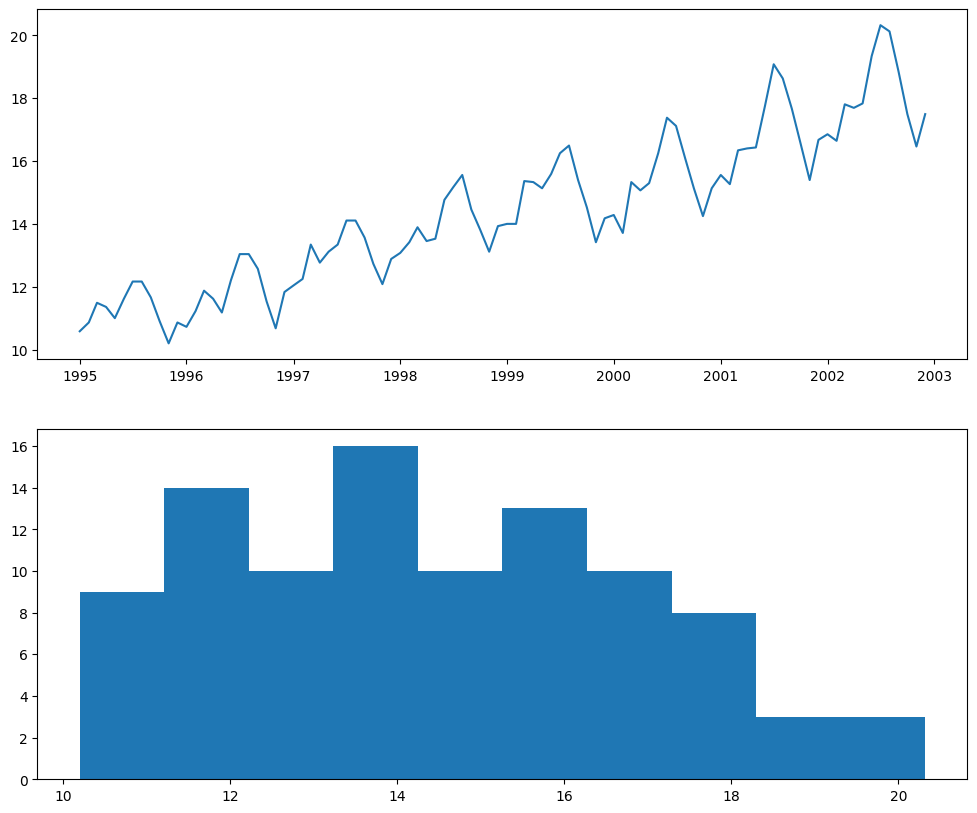

In [686]:

from math import sqrt
square_root= pd.DataFrame()
square_root = data[['Passengers']]
square_root['Passengers'] = np.sqrt(square_root.Passengers)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(square_root['Passengers'])

# Histogram
plt.subplot(212)
plt.hist(square_root['Passengers'])
plt.show()

# log transform

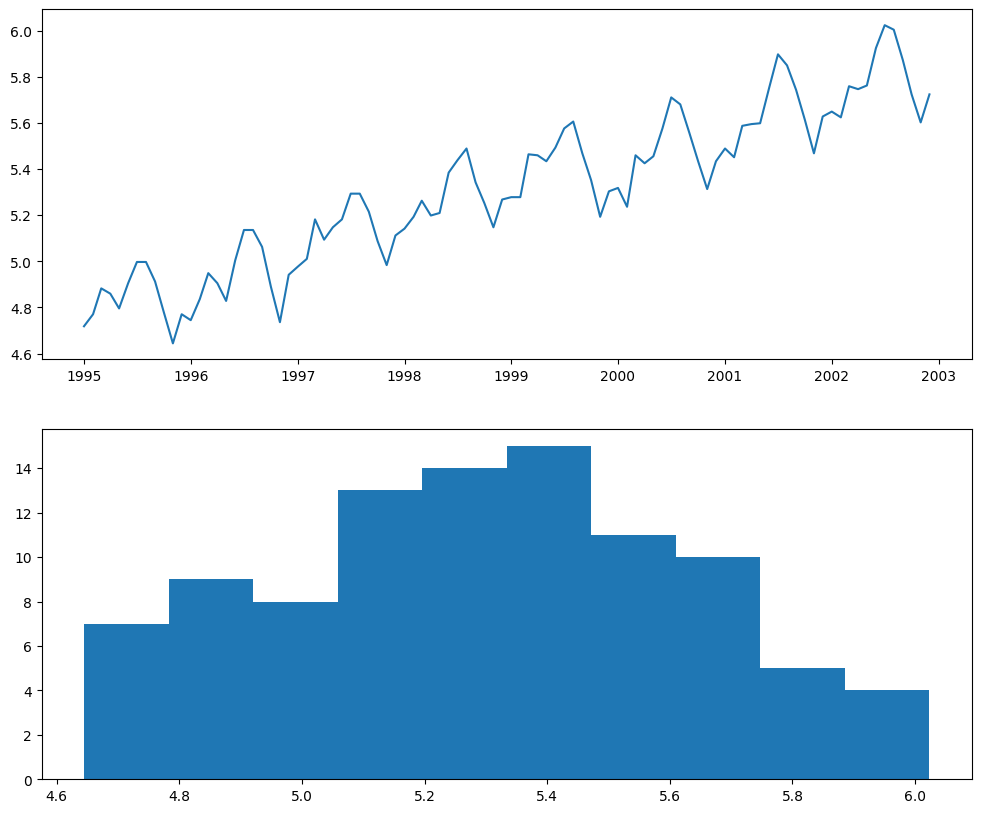

In [687]:
log = pd.DataFrame()
log = data[['Passengers']]
log['Passengers'] = np.log(log.Passengers)

# line chart
fig = plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(log['Passengers'])

# Histogram
plt.subplot(212)
plt.hist(log['Passengers'])
plt.show()

In [688]:
data["Date"] = pd.to_datetime(data.index,format = "%b-%y")
# extracting day, weekday name, month  name, year from the date column using date funvtions froooom pandas

data["month"] = data.Date.dt.strftime( " %b") # month extraction
data["year"] =  data.Date.dt.strftime("%Y") # year extraction

In [689]:
data.set_index("Date",inplace=True)

In [690]:
data

,Passengers,month,year
Date,,,
1995-01-01,112,Jan,1995
1995-02-01,118,Feb,1995
1995-03-01,132,Mar,1995
1995-04-01,129,Apr,1995
1995-05-01,121,May,1995
...,...,...,...
2002-08-01,405,Aug,2002
2002-09-01,355,Sep,2002
2002-10-01,306,Oct,2002


data visualization

<Axes: xlabel='month', ylabel='year'>

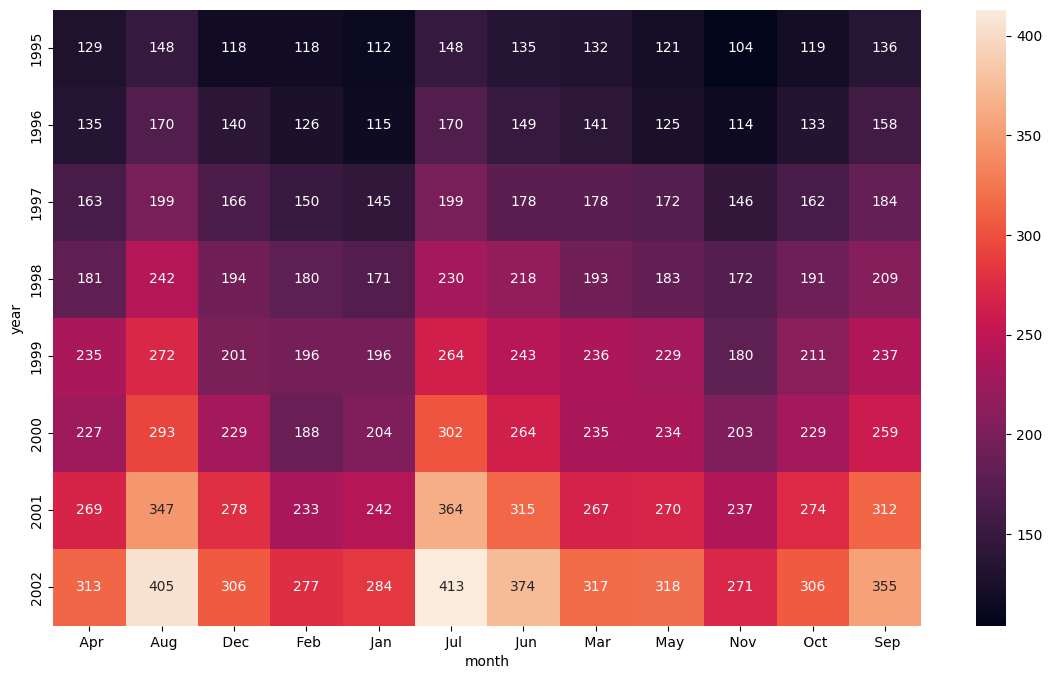

In [691]:
plt.figure(figsize= (14,8))
heatmap_y_month = pd.pivot_table(data=data,values="Passengers",index="year",columns = "month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt = "g")  # fmt iss format of the grid vaalues

<Axes: xlabel='year', ylabel='Passengers'>

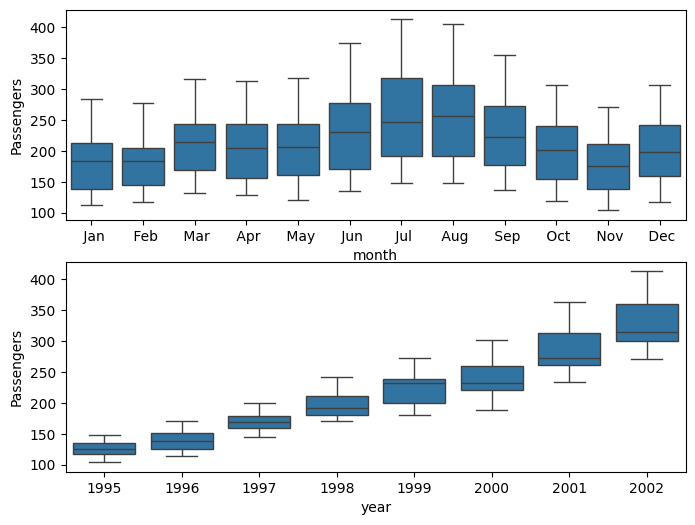

In [692]:

# boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=data)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=data)

<Axes: xlabel='year', ylabel='Passengers'>

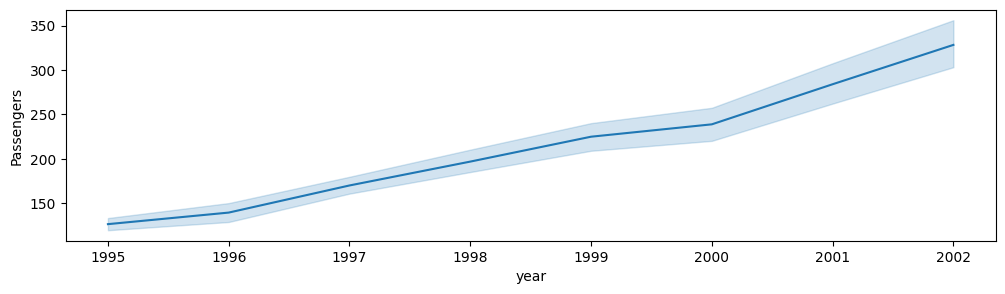

In [693]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=data)

# moving average

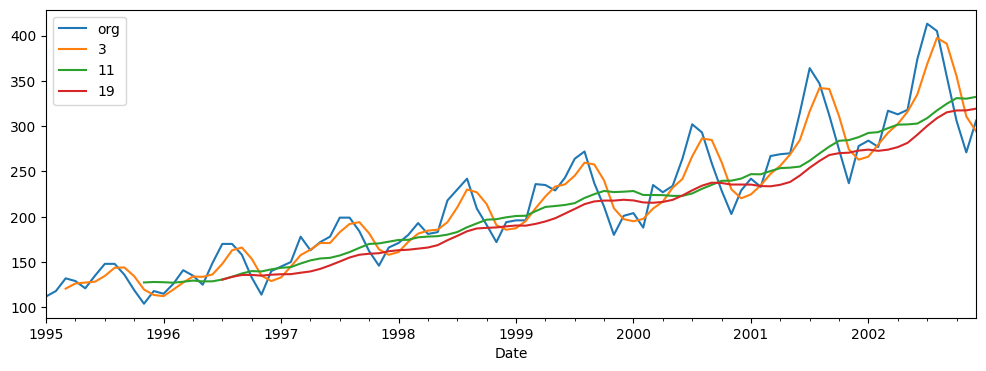

In [694]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label = "org")
for i in range(3,27,8):
    data["Passengers"].rolling(i).mean().plot(label = str(i))
plt.legend(loc = "best")

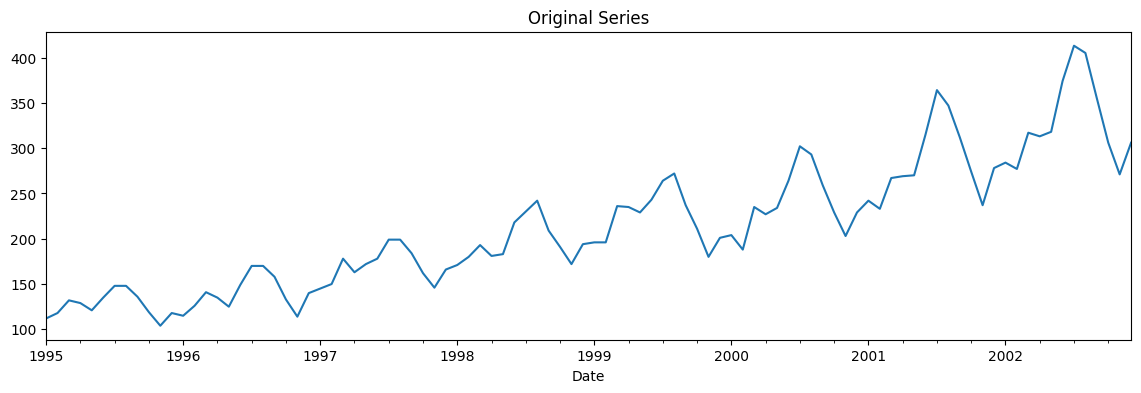

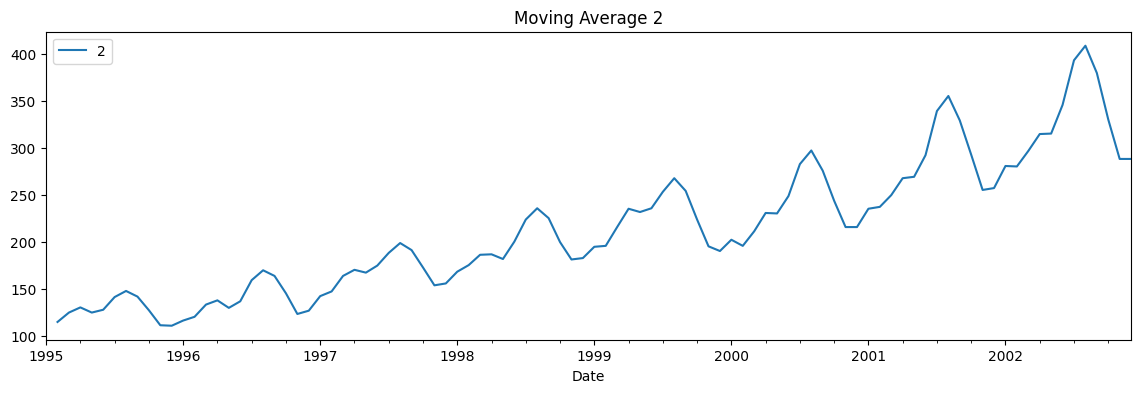

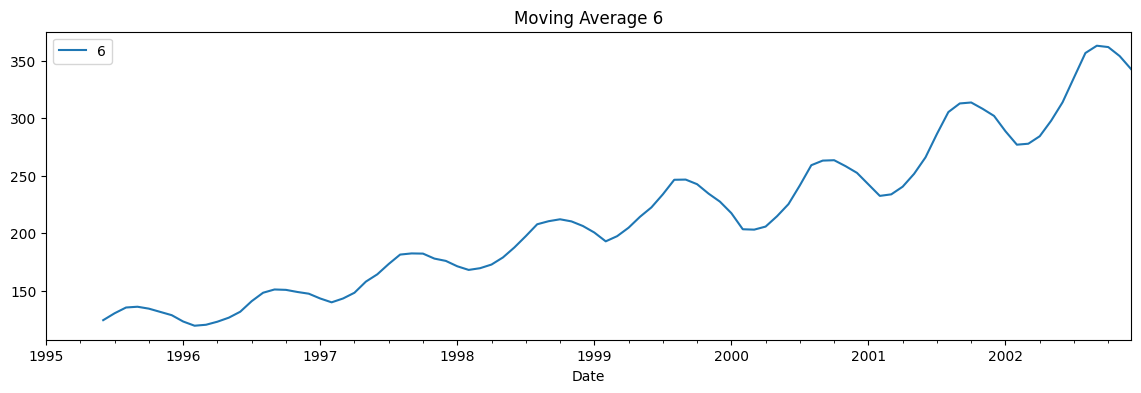

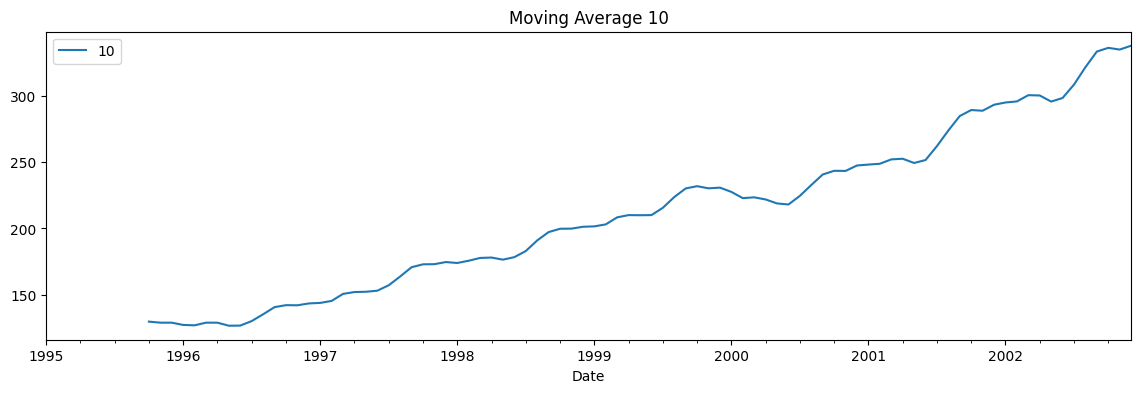

In [695]:
plt.figure(figsize=(14,4))
data.Passengers.plot(label="org")
plt.title("Original Series")
for i in range(2,13,4):
    plt.figure(figsize=(14,4))
    data["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

In [696]:
data.shape

(96, 3)

In [697]:
train = data.head(81)
test = data.tail(15)

# time series decomposition plot

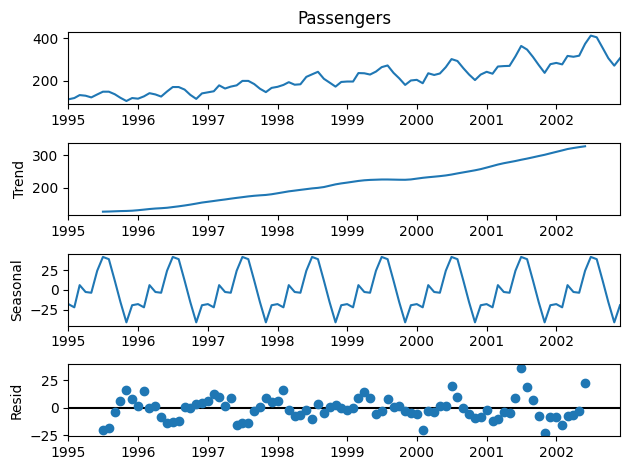

In [698]:
decompose_ts_add = seasonal_decompose(data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

#  ACF plots and PACF plots

c:\Users\91863\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


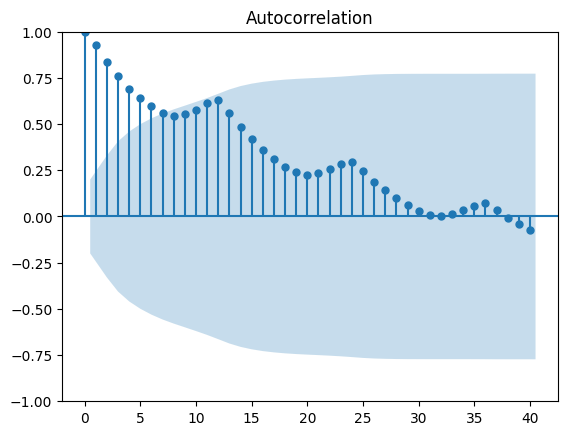

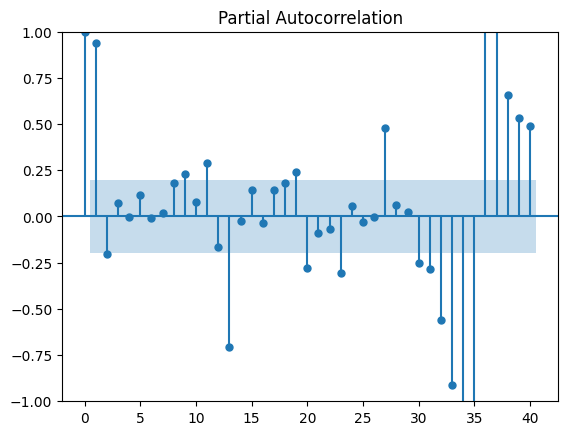

In [699]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Passengers,lags=40)
tsa_plots.plot_pacf(data.Passengers,lags=40)
plt.show()

p=6,q=2

# evaluation metrics MAPE

In [700]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# simple exponential method

In [701]:
ses_model= SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level = 0.2)
pred_ses=ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Passengers)

c:\Users\91863\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


11.742916929599648

# holt method

In [702]:
hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.1,smoothing_slope=0.2)
pred_hw=hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Passengers)

c:\Users\91863\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91863\AppData\Local\Temp\ipykernel_17224\3918404905.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.1,smoothing_slope=0.2)


15.508394195193137

# holts winter exponential smoothing with additive seasonality and additive trend

In [703]:
hwe_model_add_add= ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hwe_add_add=hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.Passengers)

c:\Users\91863\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91863\AppData\Local\Temp\ipykernel_17224\3081744938.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hwe_model_add_add= ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2)


3.32869254612705

# holts winter exponential smoothing with multiplicative seasonality and additive trend

In [704]:
hwe_model_mul_add= ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hwe_mul_add=hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Passengers)

c:\Users\91863\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91863\AppData\Local\Temp\ipykernel_17224\2392824268.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hwe_model_mul_add= ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2)


2.5496683452925804

# final model by combination train and test

In [705]:
hwe_model_add_add= ExponentialSmoothing(data["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

c:\Users\91863\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [706]:
 #forecasting for next 10 time periods

hwe_model_add_add.forecast(10)

2003-01-01    319.235270
2003-02-01    311.528386
2003-03-01    350.278691
2003-04-01    346.984976
2003-05-01    351.845022
2003-06-01    403.925707
2003-07-01    440.566797
2003-08-01    427.446477
2003-09-01    376.628169
2003-10-01    329.767502
Freq: MS, dtype: float64

In [707]:
df

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-07-31,413.0
2002-08-31,405.0
2002-09-30,355.0


In [708]:
df.reset_index(inplace=True)

In [709]:
df["t"] =1

In [710]:
df.head()

,Month,Passengers,t
0,1995-01-31,112.0,1
1,1995-02-28,118.0,1
2,1995-03-31,132.0,1
3,1995-04-30,129.0,1
4,1995-05-31,121.0,1


In [711]:
for i,row in df.iterrows():
  df['t'].iloc[i] = i+1

C:\Users\91863\AppData\Local\Temp\ipykernel_17224\3113747851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t'].iloc[i] = i+1


In [712]:
df

,Month,Passengers,t
0,1995-01-31,112.0,1
1,1995-02-28,118.0,2
2,1995-03-31,132.0,3
3,1995-04-30,129.0,4
4,1995-05-31,121.0,5
...,...,...,...
90,2002-07-31,413.0,91
91,2002-08-31,405.0,92
92,2002-09-30,355.0,93
93,2002-10-31,306.0,94


In [713]:
df["t_square"] = (df["t"]**2)

In [714]:
df["month"] = df.Month.dt.strftime("%b") # month extraction
df["year"] = df.Month.dt.strftime("%Y") # month extraction

In [715]:
df

,Month,Passengers,t,t_square,month,year
0,1995-01-31,112.0,1,1,Jan,1995
1,1995-02-28,118.0,2,4,Feb,1995
2,1995-03-31,132.0,3,9,Mar,1995
3,1995-04-30,129.0,4,16,Apr,1995
4,1995-05-31,121.0,5,25,May,1995
...,...,...,...,...,...,...
90,2002-07-31,413.0,91,8281,Jul,2002
91,2002-08-31,405.0,92,8464,Aug,2002
92,2002-09-30,355.0,93,8649,Sep,2002
93,2002-10-31,306.0,94,8836,Oct,2002


In [717]:
months= pd.get_dummies(df["month"])
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
90,0,0,0,0,0,1,0,0,0,0,0,0
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0


In [721]:
months = months[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]]

In [723]:
airline_data = pd.concat([df,months],axis=1)

In [724]:
airline_data

,Month,Passengers,t,t_square,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2002-07-31,413.0,91,8281,Jul,2002,0,0,0,0,0,0,1,0,0,0,0
91,2002-08-31,405.0,92,8464,Aug,2002,0,0,0,0,0,0,0,1,0,0,0
92,2002-09-30,355.0,93,8649,Sep,2002,0,0,0,0,0,0,0,0,1,0,0
93,2002-10-31,306.0,94,8836,Oct,2002,0,0,0,0,0,0,0,0,0,1,0


In [728]:
airline_data['log_passengers'] = np.log(airline_data['Passengers'])
airline_data.head()


,Month,Passengers,t,t_square,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,log_passengers
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,4.882802
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,4.859812
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,4.795791


In [732]:
# splitting data

train = airline_data.head(81)
test = airline_data.tail(14)

In [733]:
# linear model
import statsmodels.formula.api as smf
linear_model = smf.ols("Passengers~t",data=train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test["t"])))
rmse_linear = np.sqrt(np.mean((np.array(test["Passengers"])-np.array(pred_linear))**2))
rmse_linear

47.87107195088719

In [735]:
# exponential

exp = smf.ols("log_passengers~t",data=train).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test["t"])))
rmse_exp = np.sqrt(np.mean((np.array(test["Passengers"])-np.array(np.exp(pred_exp)))**2))
rmse_exp  # error is more than linear

42.37179623821826

In [736]:
# quadratic
quad = smf.ols("Passengers~t+t_square",data=train).fit()
pred_quad = pd.Series(quad.predict(test[["t","t_square"]]))
rmse_quad= np.sqrt(np.mean((np.array(test["Passengers"])-np.array(pred_quad))**2))
rmse_quad 

42.70987042515245

In [737]:
# additve seasonality
add_sea = smf.ols("Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]]))
rmse_add_sea= np.sqrt(np.mean((np.array(test["Passengers"])-np.array(pred_add_sea))**2))
rmse_add_sea

130.557623886014

In [738]:
# additve  quadratic seasonality
add_sea_quad = smf.ols("Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test))
rmse_add_sea_quad= np.sqrt(np.mean((np.array(test["Passengers"])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.78537191151704

In [739]:
# multi seasonality

mul_sea = smf.ols("log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=train).fit()
pred_mul_sea = pd.Series(mul_sea.predict(test))
rmse_mul_sea= np.sqrt(np.mean((np.array(test["Passengers"])-np.array(np.exp(pred_mul_sea)))**2))
rmse_mul_sea

137.28596175917127

In [740]:
# mutliplicative additve seasonality
mul_add_sea = smf.ols("log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=train).fit()
pred_mul_add_sea = pd.Series(mul_add_sea.predict(test))
rmse_mul_add_sea= np.sqrt(np.mean((np.array(test["Passengers"])-np.array(np.exp(pred_mul_add_sea)))**2))
rmse_mul_add_sea

13.188070730264613

In [741]:
# compare theresults
dataframe= {"Model":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_mul_sea","rmse_mul_add_sea"]),"RMSE_Values": [rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_add_sea]}
table_rmse = pd.DataFrame(dataframe)

table_rmse.sort_values(["RMSE_Values"])

,Model,RMSE_Values
6,rmse_mul_add_sea,13.188071
4,rmse_add_sea_quad,26.785372
1,rmse_exp,42.371796
2,rmse_quad,42.709870
0,rmse_linear,47.871072
3,rmse_add_sea,130.557624
5,rmse_mul_sea,137.285962


  *  rmse_mul_add_sea is having less error rate. so it is preferable. 